# import the labraries

In [1]:
import pandas as pd 
import numpy as np

# import the data

In [2]:
df= pd.read_csv('Iris (1).csv')
df.head(20)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

# split the data to train and test data set

In [5]:
x = df.drop(['Id', 'Species'], axis=1)
#index="column"=1 so we drop the column or we choose index="row"=0 by defult it is 0
y = df['Species']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y,test_size = 0.3, random_state = 42)
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


# Creating the model

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
prediction2 = knn.predict(x_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



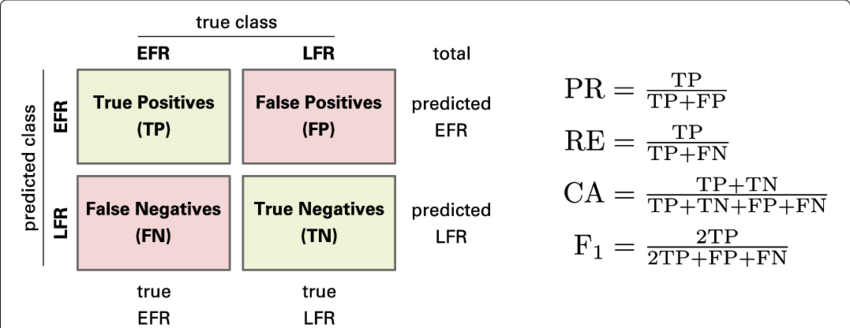

 The error rate is calculated as the average of a binary comparison of the predicted class labels (pred_i) and the true class labels (y_test). The comparison returns an array of Boolean values indicating whether each prediction is incorrect (i.e., pred_i != y_test), and taking the mean of this array gives the fraction of incorrect predictions. The resulting error rate is then added to the error_rate list.

In [8]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

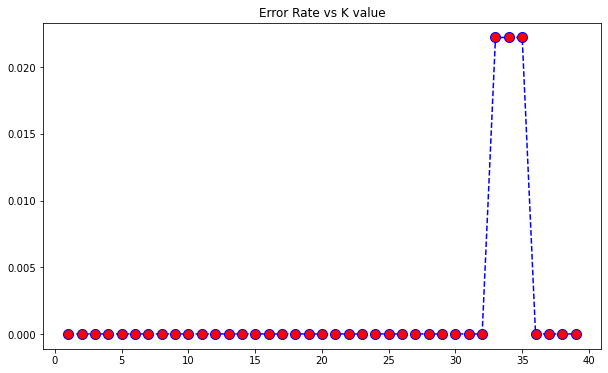

In [9]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel = ('K')
plt.ylabel = ('Error Rate')

 A high number of neighbors can  lead to a smoother decision boundary, making it more difficult to accurately separate different classes in the data. Furthermore, a large number of neighbors can result in a model that is too influenced by outliers or other rare instances in the data, leading to suboptimal performance.

# Testing the model

In [10]:
from sklearn.metrics import classification_report, accuracy_score
prediction2 = knn.predict(x_test)
print('Classification Report:\n', classification_report(y_test, prediction2))
accuracy = accuracy_score(prediction2, y_test)
print(accuracy)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

1.0


In [11]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)

from sklearn.metrics import classification_report, accuracy_score
predictionsvc = svc_model.predict(x_test)
print('Classification Report:\n', classification_report(y_test, predictionsvc))
accuracy = accuracy_score(predictionsvc, y_test)
print(accuracy)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

1.0


The number of estimators in a random forest algorithm refers to the number of decision trees that are used in the model

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
predictionrf = rfc.predict(x_test)
print('Confusion Matrix:\n', =
print('\n')
print('Classification Report:\n', classification_report(y_test, predictionrf))

SyntaxError: invalid syntax (Temp/ipykernel_11108/2904155793.py, line 5)